<a href="https://colab.research.google.com/github/GoPlusUltra/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Plan-
1. fetch the data.
2. clean the data if the null values are more than 40% then drop that column.
3. get the req data in data frame for eda.
4. plot differnt plots
5. Use differnt methods other than class to represent analysis. 

current errors

df.describe() not working

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = '/content/drive/MyDrive/almabetter/Global_Terrorism_Data.csv'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(path,encoding='latin-1',low_memory=False) #encoding data

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
pd.set_option('float_format','${:,2f}'.format)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
temp_dataframe=pd.DataFrame(df.columns,list(df.isna().sum()))

In [8]:
temp_dataframe

,0
0,eventid
0,iyear
0,imonth
0,iday
172452,approxdate
...,...
0,INT_LOG
0,INT_IDEO
0,INT_MISC
0,INT_ANY


mutiple, doubterr, guncertain1,nkill,ishostkid has ValueError: Invalid format specifier

In [9]:
df['country'].unique()

array([  58,  130,  160,   78,  101,  217,  218,   98,  499,   65,   83,
        222,  362,  199,  102,  185,   30,   60,   11,  110,   96,  209,
        158,   94,  603,   45,   26,  145,  142,   21,   38,   14,  153,
        230,  198,   49,  406,   36,   97,  161,  201,  156,  106,  155,
         15,  236,   92,   69,  428,   31,  604,  605,  162,    6,   61,
        205,   87,  195,  136,   53,  138,    4,  159,   43,   88,  235,
         59,  144,  121,  178,   29,  100,   42,  377,    7,  200,  184,
        215,  183,  104,   95,  182,  203,  186,  139,   17,  147,   20,
        207,   19,    8,  128,  173,   56,   93,  124,  403,  359,   55,
        349,   86,  137,  208,  213,  151,  111,   72,  113,   18,   89,
        174,  231,   84,   80,  532,   22,   81,  127,  221,    5,   41,
        176,   57,  164,   32,  196,  197,  116,   91,   70,   66,   33,
        143,  166,  146,  141,  204,   68,   67,   76,  122,  129,   90,
        108,  157,   44,  112,   47,  123,   75,  2

In [10]:
df=df[['eventid','iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','attacktype1_txt','targtype1_txt','natlty1_txt','target1','gname','motive','weaptype1_txt','weapsubtype1_txt','dbsource']]

In [11]:
df.rename(columns={'eventid':'event','iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'province','attacktype1_txt':'attack_type','targtype1_txt':'target_type','targsubtype1_txt':'target_sub_type','target1':'target_name','natlty1_txt':'targeted_nationality','gname':'attacker_group','motive':'motive_of_attacker','weaptype1_txt':'weapon_type','weapsubtype1_txt':'weapon_subtype','dbsource':'database_source'},inplace=True)

In [ ]:
#df.head(10) is not working

In [12]:
df.columns

Index(['event', 'year', 'month', 'day', 'country', 'region', 'province',
       'city', 'latitude', 'longitude', 'attack_type', 'target_type',
       'targeted_nationality', 'target_name', 'attacker_group',
       'motive_of_attacker', 'weapon_type', 'weapon_subtype',
       'database_source'],
      dtype='object')

In [ ]:
#Plotting a graph of total no of attacks in year   Need to change the axis of plot

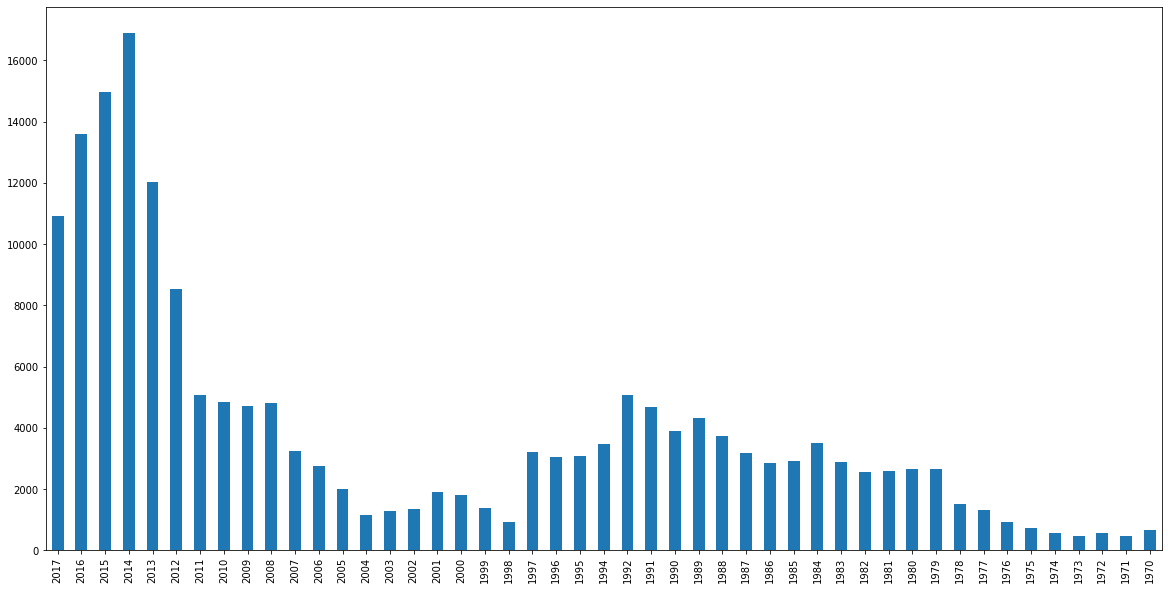

In [13]:
plt.figure(figsize=(20,10))

df.year.value_counts().sort_index(ascending=False).plot(kind='bar')


In [14]:
#plotting the graph of no of attacks in top 50 countries

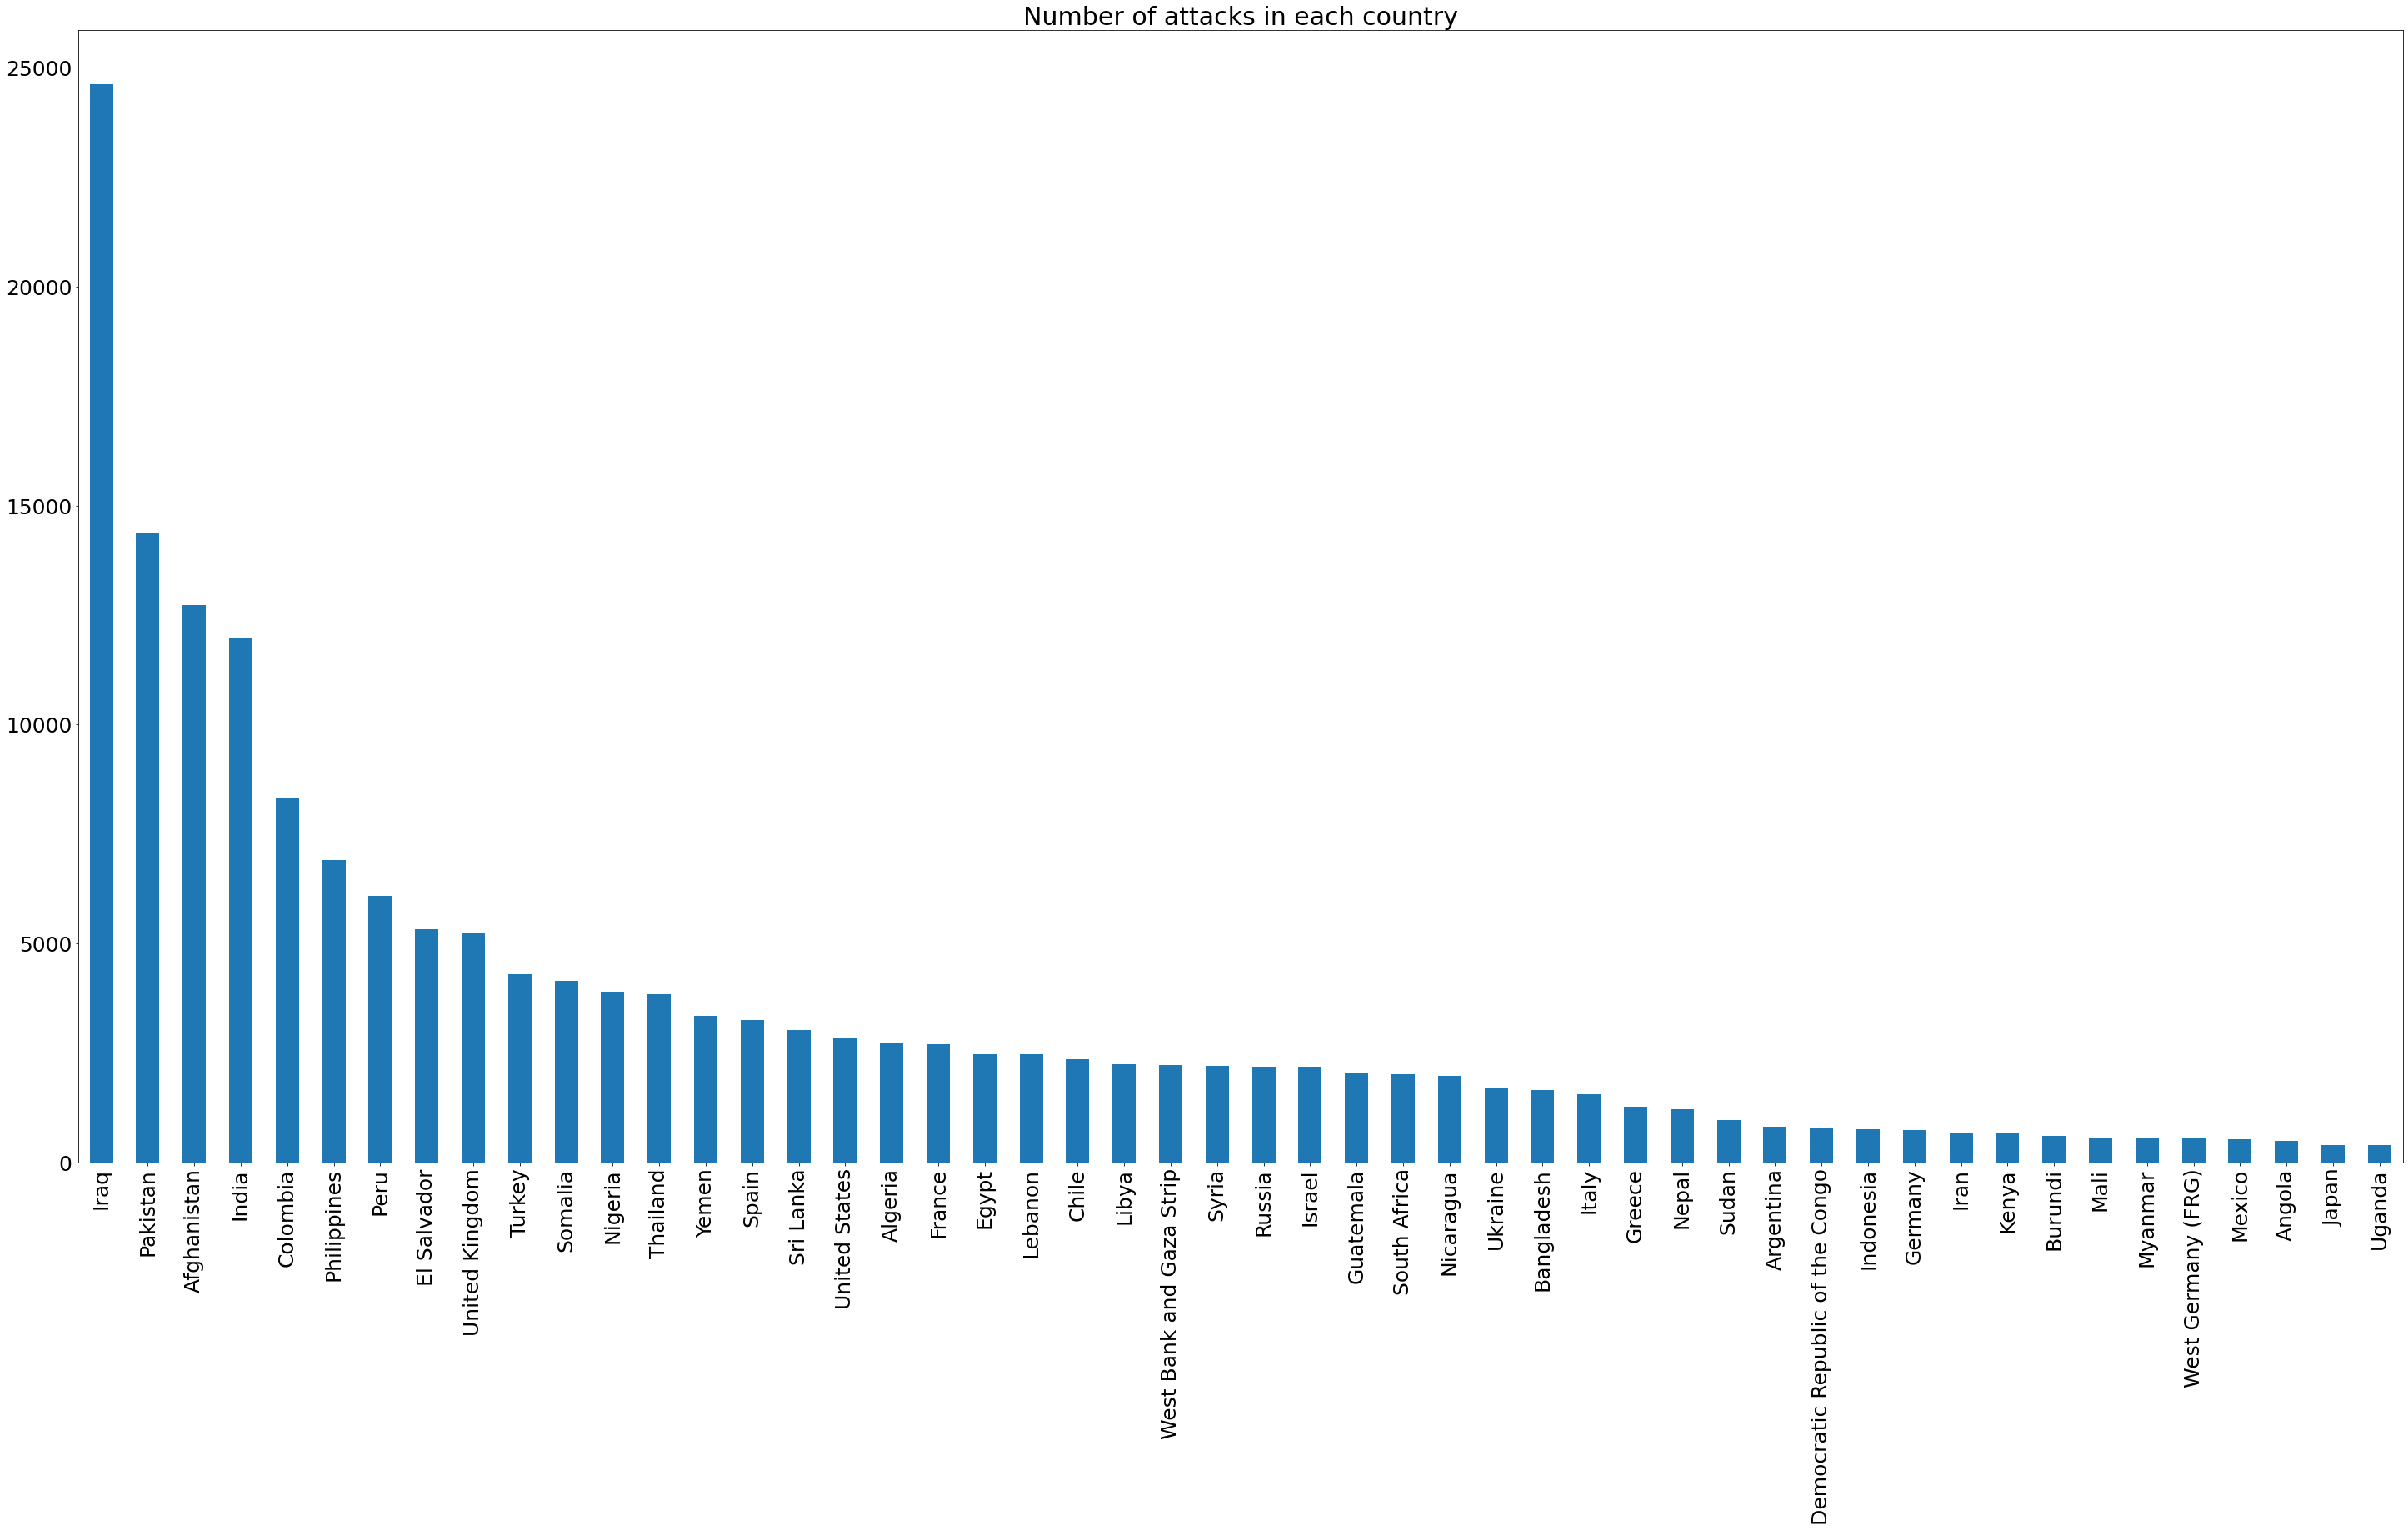

In [16]:
df['country'].value_counts().head(50).plot(kind='bar',
                                    figsize=(50,25),
                                    title="Number of attacks in each country")
plt.rcParams.update({'font.size': 25})

In [17]:
#Plotting the msot attcks by the group excluding unknown attacks

In [18]:
df['attacker_group'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: attacker_group, Length: 3537, dtype: int64

In [19]:
temp_attacker_group_df=df[['attacker_group']]
temp_attacker_group_df.replace('Unknown',np.nan,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


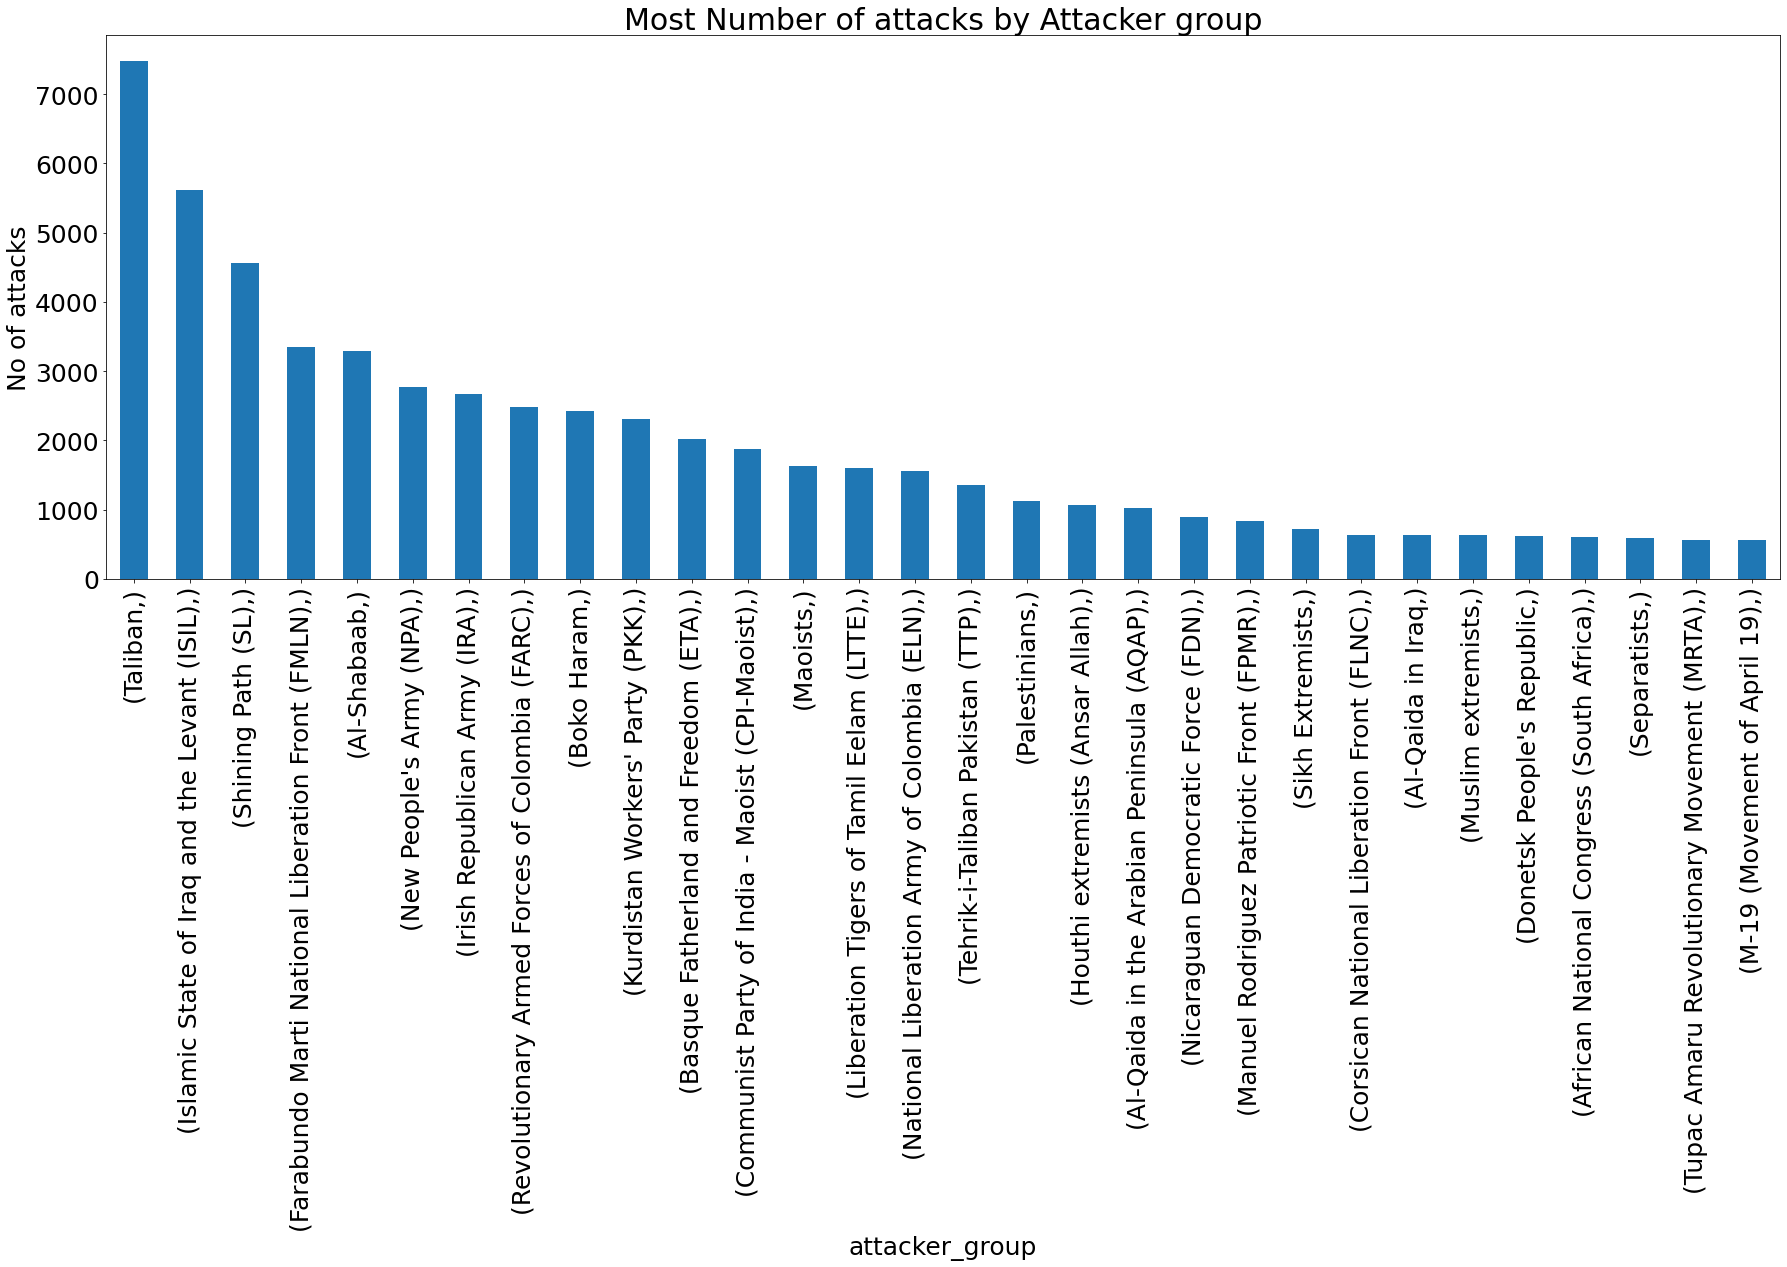

In [20]:
temp_attacker_group_df.value_counts().head(30).plot(kind='bar',
                                    figsize=(30,10),
                                    title="Most Number of attacks by Attacker group")
plt.ylabel('No of attacks')
plt.rcParams.update({'font.size': 25})

In [21]:
df['province'].value_counts()

Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: province, Length: 2855, dtype: int64

In [ ]:
#finding no of attacks in top attacked countries by provinces             #USE GROUPBY

In [22]:
temp_df=df[['country','province']]
rx=temp_df.groupby(['country','province'])

In [23]:
temp_df.value_counts().head(10)

country         province          
Iraq            Baghdad               7644
United Kingdom  Northern Ireland      4498
Pakistan        Balochistan           3710
Iraq            Saladin               3411
                Al Anbar              3299
                Nineveh               3241
Pakistan        Sindh                 3206
                Khyber Pakhtunkhwa    3084
Iraq            Diyala                3041
Peru            Lima                  2615
dtype: int64

In [29]:
df['attack_type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

In [ ]:
#plotting attack types plot using seaborn

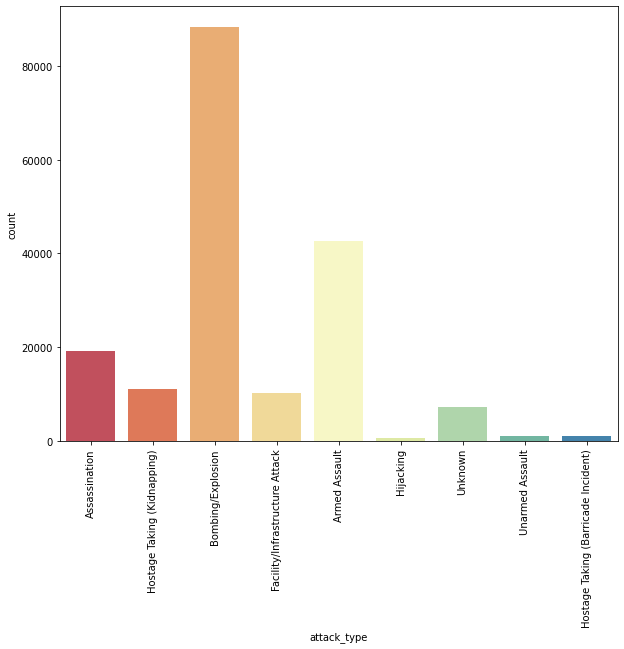

In [71]:
plt.subplots(figsize=(10,8))
sns.countplot(x='attack_type',data=df,palette='Spectral')
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 10})

In [43]:
df['weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [ ]:
#plotting weapon type used for attack

In [68]:
#df['weapon_type'].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))

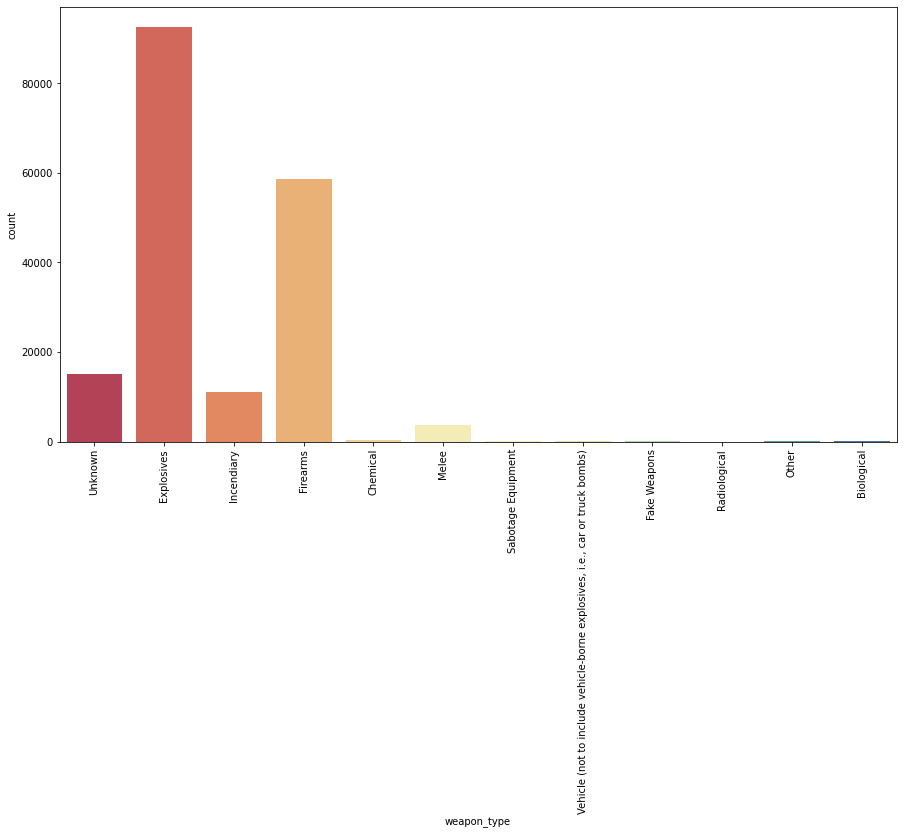

In [73]:
plt.subplots(figsize=(15,8))
sns.countplot(x='weapon_type',data=df,palette='Spectral')
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 10})

In [25]:
df.columns

Index(['event', 'year', 'month', 'day', 'country', 'region', 'province',
       'city', 'latitude', 'longitude', 'attack_type', 'target_type',
       'targeted_nationality', 'target_name', 'attacker_group',
       'motive_of_attacker', 'weapon_type', 'weapon_subtype',
       'database_source'],
      dtype='object')

In [77]:
import folium
from folium.plugins import MarkerCluster
 

In [104]:
loc_df=df[['latitude','longitude']]
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   177135 non-null  float64
 1   longitude  177134 non-null  float64
dtypes: float64(2)
memory usage: 2.8 MB


In [ ]:
loc_df.dropna()

In [108]:
n = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
for i in range(0,len(loc_df)):
  if loc_df.iloc[i]!="nan":
   folium.Marker(
      location=[loc_df.iloc[i]['latitude'], loc_df.iloc[i]['longitude']]
      
   ).add_to(n)

ValueError: ignored

In [111]:
df.head()

ValueError: ignored

ValueError: ignored